# Correlations Between Income Inequality, Unemployment, Education, and Social Issues

# Introduction

In the past three years, the Covid-19 pandemic has had a significant negative impact on the global economy, resulting in job losses for many people. In New Zealand, this has been accompanied by a spate of disturbing incidents such as youth suicides and indiscriminate intentional assaults. It is possible that there is a correlation between these incidents and the widening wealth gap and unemployment rates in the country. Additionally, with an increasing number of people opting for postgraduate education, there is a need to investigate the relationship between tertiary education rates and unemployment. By examining these factors, we may be able to gain a better understanding of the challenges facing the New Zealand population and identify potential solutions to address them.

#### Datasets used:
1. shared_prosperity_assignment_dataset_mangled.csv

#### Dataset sources: https://sharedprosperity.co.nz/Dashboard

### Research Questions

1. Does the gap between the rich and the poor have a positive correlation with suicide and crime rates?
2. Is the unemployment rate positively correlated with the suicide and crime rates?
3. What is the relationship between the tertiary education rate and unemployment rates?


### Executive Summary

#### Data Wrangling
Prior to analysis, the dataset was carefully cleaned to address issues such as missing values, duplicates, and outliers. To ensure data accuracy, box plots were generated to identify any remaining outliers. After thorough examination, no outliers were detected, indicating that the dataset is suitable for analysis.

#### Data Extracted for Analysis
For the analysis, seven variables were selected from the original dataset. These variables include "P80:P20_BHC", "GINI-BHC", "tertiary_education_participation_rate", "suicides_per_100000", and "violent_crime_victimisations_rate". Their descriptions are as follows:

•	"P80:P20_BHC": This variable represents the ratio of income between the 80th and 20th percentile before housing costs. As the income inequality between the top and bottom percentiles increases, the ratio increases as well.

•	"GINI-BHC": This variable is the Gini coefficient multiplied by 100 before housing costs. The coefficient ranges between 0 and 1, where 0 represents perfect equality and 1 represents perfect inequality. It is a commonly used measure for income inequality and provides an overview of the entire income distribution.

•	"tertiary_education_participation_rate": This variable represents the number of enrollments in tertiary education as a percentage of the population aged 15 and over.

•	"suicides_per_100000": This variable represents the number of suicides per 100,000 population.

•	"violent_crime_victimisations_rate": This variable represents the incidence of violent crime as a percentage of the population.

These variables have been selected to explore the research questions related to income inequality, education, and their impact on social issues such as suicide and crime rates.


#### EDA & Data Analysis
Firstly, the analysis reveals a weak negative correlation between the gap between the rich and the poor and suicide and violent crime rates. The line plot of P80:P20, suicides, and crime rate shows that the P80:P20 ratio averaged around 2.3 in the early 1980s, increasing to around 2.6 by 2010. In contrast, suicides per 100,000 population slightly improved in the 1990s to 15 and remained stable at around 12 until 2015. The crime rate has been trending downward over the years. Consequently, the trend of P80:P20 and suicides/crime rate are opposite. The correlation analysis confirms this finding, with the correlation coefficient between P80:P20 and suicides being -0.33 and the correlation coefficient between P80:P20 and the crime rate being -0.46.

Secondly, the unemployment rate exhibits a moderate positive correlation with suicides and crime rates, with correlation coefficients of 0.5 and 0.53, respectively. This means that as the unemployment rate increases, there is also an increase in the rates of suicides and crimes. While this correlation does not necessarily imply causation, it is an important finding that there may be a link between unemployment and social instability.

Thirdly, the analysis reveals a strong negative correlation between the tertiary education rate and unemployment rates. The higher the tertiary education rate, the lower the unemployment rate. The tertiary education rate by year line plot shows that it was around 8% in the early 1990s, reaching more than 13% in 2006. During the same period, the unemployment rate decreased from 10% to 4%. Moreover, the correlation coefficient between the tertiary education rate and the unemployment rate is -0.84, indicating a strong relationship. 

#### Conclusion
In conclusion, this analysis highlights the correlations between income inequality, unemployment, tertiary education rates, and suicide and crime rates. The findings suggest that income inequality has a weak negative correlation with suicide and violent crime rates, while unemployment has a moderate positive correlation with both suicide and crime rates. On the other hand, the analysis reveals a strong negative correlation between the tertiary education rate and unemployment rates. These results demonstrate the importance of addressing income inequality and providing access to education to promote social stability and reduce rates of suicide and crime. 

However, it is essential to acknowledge the limitations of our analysis, such as the data's quality, completeness, and lack of access to more recent data beyond 2015. Despite these limitations, our findings may provide insight into the possible relationships between these variables and their potential impact on society. Further research and analysis are necessary to confirm these findings and explore more recent data to determine the current trends.


# Data Wrangling 

In [76]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Set some Pandas options as you like
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.width', 100)

In [78]:
#this line enables the plots to be embedded into the notebook
%matplotlib inline

In [79]:
#import data 
df = pd.read_csv("/Users/fifi/Documents/Courses/158739_introduction_to_analytics/datasets/assignment1/final_dataset/shared_prosperity_assignment_dataset_mangled.csv")
pd.options.display.max_info_columns = 200
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 103 columns):
 #    Column                                                           Non-Null Count  Dtype  
---   ------                                                           --------------  -----  
 0    Q5:Q1                                                            37 non-null     object 
 1    D10:D1                                                           37 non-null     object 
 2    D10:D1-4(Palma)                                                  37 non-null     object 
 3    P90:P10_bhc                                                      37 non-null     object 
 4    P80:P20_bhc                                                      37 non-null     object 
 5    P80:P50_bhc                                                      37 non-null     object 
 6    P50:P20_bhc                                                      37 non-null     object 
 7    GINI-BHC                           

,Q5:Q1,D10:D1,D10:D1-4(Palma),P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,LIEH_B50_CV_median_AHC,LIEH_B60_CV_median_AHC,LIS65H_B60_CV_median_AHC,LISPH_B60_CV_median_AHC,LIS65H_B50_CV_median_AHC,LISPH_B50_CV_median_AHC,child_poverty_ahc_perc_HH_B50_CV,child_poverty_ahc_perc_HH_B60_CV,child_poverty_ahc_perc_HH_B40_contemp_median,child_poverty_ahc_perc_HH_B50_contemp_median,child_poverty_ahc_perc_HH_B60_contemp_median,child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents,child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents,rate_of_personal_insolvencies,loan_delinquency_percent,national_house_rental_A30%_income_spend,national_house_purchasing_A30%_income_spend,national_house_rental_HAM,national_house_purchasing_HAM,home_ownership_rate,homelessness_percentage_of_population,priority_A_state_housing_applicants_as_pop_percent,priority_B_state_housing_applicants_as_pop_percent,debt_servicing_as_percent_of_disp_inc,house_median_multiples,unemployment_rate,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,employees_working_long_hours,labour_market_insecurity,long_term_unemployment_rate,pop_15_to_29_NEET,low_pay_percent_OECD_def,low_pay_percent_120percent_MW_def,living_min_wage_gap_magnitude,LIS_ms-16,LP:RPW_ms-16,teriary_education_participation_rate,education_spend_as_percent_of_GDP,education_spend_as_percent_of_total_gov_expenses,median_teriary_loan_as_perc_of_med_inc_AHC,median_teriary_loan_balance_as_perc_of_med_inc_AHC,university_affordability_ratio_to_mean_salary,polytechnics_affordability_ratio_to_mean_salary,wananga_affordability_ratio_to_mean_salary,bachelors_earning_premium_hourly,dips_cert_earning_premium_hourly,school_earning_premium_hourly,bachelors_earning_premium_weekly,dips_cert_earning_premium_weekly,school_earning_premium_weekly,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,depression_adult,excellent_very_good_or_good_self_rated_health,psychological_distress_adult,mood_anxiety_disorder_adult,healthy_weight_adult,unmet_after_hours_care_due_to_cost_adult,unmet_GP_care_due_to_cost_adult,veg_and_fruit_intake_adult,breakfast_eaten_at_home_less_5_days_a_week_child,emotional_behavioural_problems_child,adult_diabetes_rates,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,healthy_weight_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,total_post_sentence_offender_population_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,regional_gdp_proportional_variation,difference_in_percent_for_low_income_by_gender,gender_pay_gap,year
0,5.09,8.03,1.21,3.87,2.52,1.66,0.66,32.2,-,-,-,19.9,54.9,19.0,13.0,22.0,-,7.0,3.0,1.0,7.0,-,-,-,1.363636363636364,3.272727272727273,34.0,NaN,10.0,20.0,29.0,36.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,71.422294,NaN,NaN,NaN,NaN,NAN,8.4,3.3,2.3,NaN,NaN,NAN,32.93502612,NaN,NaN,NaN,NaN,NaN,NAN,7.3\N\P,nan\K,nan\I,nan\Z,nan\X,nan\R,nan\F,nan\P,nan\B,nan\T,nan\H,nan\O,nan\D,nan\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.148386,NaN,NaN,NaN,NaN,8.181108,17.119505,NaN,2.0,NaN,1994-12-31 00:00:00
1,4.46,6.35,1.1,3.43,2.42,1.6,0.66,30.2,-,-,-,21.3,59.50000000000001,11.0,6.0,10.0,-,4.0,6.0,2.0,6.0,-,-,-,1.5,2.5,15.0,NaN,5.0,7.0,16.0,57.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAN,NaN,NaN,NaN,NaN,8.0,3.3,2.1,NaN,NaN,NaN,22.06366623,NaN,NaN,NaN,NaN,NaN,NAN,nan\T\Z,nan\A,nan\P,nan\H,nan\P,nan\W,nan\I,nan\Z,nan\W,nan\L,nan\G,nan\P,nan\

In [80]:
#replace all the non-digits apart from decimal point
df = df.applymap(lambda x: re.sub('[^0-9\.]+', '', str(x)))
df

,Q5:Q1,D10:D1,D10:D1-4(Palma),P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,LIEH_B50_CV_median_AHC,LIEH_B60_CV_median_AHC,LIS65H_B60_CV_median_AHC,LISPH_B60_CV_median_AHC,LIS65H_B50_CV_median_AHC,LISPH_B50_CV_median_AHC,child_poverty_ahc_perc_HH_B50_CV,child_poverty_ahc_perc_HH_B60_CV,child_poverty_ahc_perc_HH_B40_contemp_median,child_poverty_ahc_perc_HH_B50_contemp_median,child_poverty_ahc_perc_HH_B60_contemp_median,child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents,child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents,rate_of_personal_insolvencies,loan_delinquency_percent,national_house_rental_A30%_income_spend,national_house_purchasing_A30%_income_spend,national_house_rental_HAM,national_house_purchasing_HAM,home_ownership_rate,homelessness_percentage_of_population,priority_A_state_housing_applicants_as_pop_percent,priority_B_state_housing_applicants_as_pop_percent,debt_servicing_as_percent_of_disp_inc,house_median_multiples,unemployment_rate,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,employees_working_long_hours,labour_market_insecurity,long_term_unemployment_rate,pop_15_to_29_NEET,low_pay_percent_OECD_def,low_pay_percent_120percent_MW_def,living_min_wage_gap_magnitude,LIS_ms-16,LP:RPW_ms-16,teriary_education_participation_rate,education_spend_as_percent_of_GDP,education_spend_as_percent_of_total_gov_expenses,median_teriary_loan_as_perc_of_med_inc_AHC,median_teriary_loan_balance_as_perc_of_med_inc_AHC,university_affordability_ratio_to_mean_salary,polytechnics_affordability_ratio_to_mean_salary,wananga_affordability_ratio_to_mean_salary,bachelors_earning_premium_hourly,dips_cert_earning_premium_hourly,school_earning_premium_hourly,bachelors_earning_premium_weekly,dips_cert_earning_premium_weekly,school_earning_premium_weekly,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,depression_adult,excellent_very_good_or_good_self_rated_health,psychological_distress_adult,mood_anxiety_disorder_adult,healthy_weight_adult,unmet_after_hours_care_due_to_cost_adult,unmet_GP_care_due_to_cost_adult,veg_and_fruit_intake_adult,breakfast_eaten_at_home_less_5_days_a_week_child,emotional_behavioural_problems_child,adult_diabetes_rates,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,healthy_weight_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,total_post_sentence_offender_population_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,regional_gdp_proportional_variation,difference_in_percent_for_low_income_by_gender,gender_pay_gap,year
0,5.09,8.03,1.21,3.87,2.52,1.66,0.66,32.2,,,,19.9,54.9,19.0,13.0,22.0,,7.0,3.0,1.0,7.0,,,,1.363636363636364,3.272727272727273,34.0,,10.0,20.0,29.0,36.0,10.0,,,,,,,71.42229383330893,,,,,,8.4,3.3,2.3,,,,32.93502612,,,,,,,7.3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14.14838582342624,,,,,8.181107797658493,17.11950519107577,,2.0,,19941231000000
1,4.46,6.35,1.1,3.43,2.42,1.6,0.66,30.2,,,,21.3,59.50000000000001,11.0,6.0,10.0,,4.0,6.0,2.0,6.0,,,,1.5,2.5,15.0,,5.0,7.0,16.0,57.0,6.0,,,,,,,,,,,,,8.0,3.3,2.1,,,,22.06366623,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,12.97276919861145,,,,,,,,1.0,,19901231000000
2,5.94,9.75,1.44,4.26,2.67,1.64,0.62,35.1,,,,18.9,57.5,20.0,14.0,13.0,18.0,9.0,11.0,5.0,5.0,9.0,1.947368421052632,3.210526315789474,2.142857142857143,3.571428571428572,18.0,25.0,12.0,20.0,28.0,25.0,13.0,0.140193975,7.117537313432836,0.286207073,0.522625904,0.67

In [81]:
#Convert columns with empty values to NaN
df = df.replace('', np.nan)
df.head()

,Q5:Q1,D10:D1,D10:D1-4(Palma),P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,LIEH_B50_CV_median_AHC,LIEH_B60_CV_median_AHC,LIS65H_B60_CV_median_AHC,LISPH_B60_CV_median_AHC,LIS65H_B50_CV_median_AHC,LISPH_B50_CV_median_AHC,child_poverty_ahc_perc_HH_B50_CV,child_poverty_ahc_perc_HH_B60_CV,child_poverty_ahc_perc_HH_B40_contemp_median,child_poverty_ahc_perc_HH_B50_contemp_median,child_poverty_ahc_perc_HH_B60_contemp_median,child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents,child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents,rate_of_personal_insolvencies,loan_delinquency_percent,national_house_rental_A30%_income_spend,national_house_purchasing_A30%_income_spend,national_house_rental_HAM,national_house_purchasing_HAM,home_ownership_rate,homelessness_percentage_of_population,priority_A_state_housing_applicants_as_pop_percent,priority_B_state_housing_applicants_as_pop_percent,debt_servicing_as_percent_of_disp_inc,house_median_multiples,unemployment_rate,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,employees_working_long_hours,labour_market_insecurity,long_term_unemployment_rate,pop_15_to_29_NEET,low_pay_percent_OECD_def,low_pay_percent_120percent_MW_def,living_min_wage_gap_magnitude,LIS_ms-16,LP:RPW_ms-16,teriary_education_participation_rate,education_spend_as_percent_of_GDP,education_spend_as_percent_of_total_gov_expenses,median_teriary_loan_as_perc_of_med_inc_AHC,median_teriary_loan_balance_as_perc_of_med_inc_AHC,university_affordability_ratio_to_mean_salary,polytechnics_affordability_ratio_to_mean_salary,wananga_affordability_ratio_to_mean_salary,bachelors_earning_premium_hourly,dips_cert_earning_premium_hourly,school_earning_premium_hourly,bachelors_earning_premium_weekly,dips_cert_earning_premium_weekly,school_earning_premium_weekly,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,depression_adult,excellent_very_good_or_good_self_rated_health,psychological_distress_adult,mood_anxiety_disorder_adult,healthy_weight_adult,unmet_after_hours_care_due_to_cost_adult,unmet_GP_care_due_to_cost_adult,veg_and_fruit_intake_adult,breakfast_eaten_at_home_less_5_days_a_week_child,emotional_behavioural_problems_child,adult_diabetes_rates,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,healthy_weight_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,total_post_sentence_offender_population_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,regional_gdp_proportional_variation,difference_in_percent_for_low_income_by_gender,gender_pay_gap,year
0,5.09,8.03,1.21,3.87,2.52,1.66,0.66,32.2,NaN,NaN,NaN,19.9,54.9,19.0,13.0,22.0,NaN,7.0,3.0,1.0,7.0,NaN,NaN,NaN,1.363636363636364,3.272727272727273,34.0,NaN,10.0,20.0,29.0,36.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,71.42229383330893,NaN,NaN,NaN,NaN,NaN,8.4,3.3,2.3,NaN,NaN,NaN,32.93502612,NaN,NaN,NaN,NaN,NaN,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.14838582342624,NaN,NaN,NaN,NaN,8.181107797658493,17.11950519107577,NaN,2.0,NaN,19941231000000
1,4.46,6.35,1.1,3.43,2.42,1.6,0.66,30.2,NaN,NaN,NaN,21.3,59.50000000000001,11.0,6.0,10.0,NaN,4.0,6.0,2.0,6.0,NaN,NaN,NaN,1.5,2.5,15.0,NaN,5.0,7.0,16.0,57.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.3,2.1,NaN,NaN,NaN,22.06366623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [82]:
# Convert data type to float
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 103 columns):
 #    Column                                                           Non-Null Count  Dtype  
---   ------                                                           --------------  -----  
 0    Q5:Q1                                                            18 non-null     float64
 1    D10:D1                                                           17 non-null     float64
 2    D10:D1-4(Palma)                                                  17 non-null     float64
 3    P90:P10_bhc                                                      20 non-null     float64
 4    P80:P20_bhc                                                      21 non-null     float64
 5    P80:P50_bhc                                                      21 non-null     float64
 6    P50:P20_bhc                                                      21 non-null     float64
 7    GINI-BHC                           

In [86]:
#modify the year column
df['year'] = pd.to_datetime(df['year'].astype(str).str[:4], format='%Y').dt.year
df['year'].dtypes
df['year'].values

array([1994, 1990, 2011, 2004, 1987, 1999, 2017, 2013, 2012, 1986, 1988,
       1998, 2000, 2015, 2003, 2009, 1985, 2008, 1995, 1997, 1991, 1992,
       1984, 2007, 1982, 1993, 1989, 2006, 2010, 2014, 2002, 1996, 2016,
       1983, 2005, 2018, 2001])

In [88]:
#sort by year
df = df.sort_values('year', ascending=True)
df['year'].head(10)

24    1982
33    1983
22    1984
16    1985
9     1986
4     1987
10    1988
26    1989
1     1990
20    1991
Name: year, dtype: int64

In [89]:
#reset the index
df = df.reset_index(drop=True)
df['year'].head(10)

0    1982
1    1983
2    1984
3    1985
4    1986
5    1987
6    1988
7    1989
8    1990
9    1991
Name: year, dtype: int64

In [91]:
#drop duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 103 columns):
 #    Column                                                           Non-Null Count  Dtype  
---   ------                                                           --------------  -----  
 0    Q5:Q1                                                            18 non-null     float64
 1    D10:D1                                                           17 non-null     float64
 2    D10:D1-4(Palma)                                                  17 non-null     float64
 3    P90:P10_bhc                                                      20 non-null     float64
 4    P80:P20_bhc                                                      21 non-null     float64
 5    P80:P50_bhc                                                      21 non-null     float64
 6    P50:P20_bhc                                                      21 non-null     float64
 7    GINI-BHC                           

In [38]:
#find the outliers: GINI coefficient should between 0 and 1, but the max is 101.5, which is not correct
df.describe()

,Q5:Q1,D10:D1,D10:D1-4(Palma),P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,LIEH_B50_CV_median_AHC,LIEH_B60_CV_median_AHC,LIS65H_B60_CV_median_AHC,LISPH_B60_CV_median_AHC,LIS65H_B50_CV_median_AHC,LISPH_B50_CV_median_AHC,child_poverty_ahc_perc_HH_B50_CV,child_poverty_ahc_perc_HH_B60_CV,child_poverty_ahc_perc_HH_B40_contemp_median,child_poverty_ahc_perc_HH_B50_contemp_median,child_poverty_ahc_perc_HH_B60_contemp_median,child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents,child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents,rate_of_personal_insolvencies,loan_delinquency_percent,national_house_rental_A30%_income_spend,national_house_purchasing_A30%_income_spend,national_house_rental_HAM,national_house_purchasing_HAM,home_ownership_rate,homelessness_percentage_of_population,priority_A_state_housing_applicants_as_pop_percent,priority_B_state_housing_applicants_as_pop_percent,debt_servicing_as_percent_of_disp_inc,house_median_multiples,unemployment_rate,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,employees_working_long_hours,labour_market_insecurity,long_term_unemployment_rate,pop_15_to_29_NEET,low_pay_percent_OECD_def,low_pay_percent_120percent_MW_def,living_min_wage_gap_magnitude,LIS_ms-16,LP:RPW_ms-16,teriary_education_participation_rate,education_spend_as_percent_of_GDP,education_spend_as_percent_of_total_gov_expenses,median_teriary_loan_as_perc_of_med_inc_AHC,median_teriary_loan_balance_as_perc_of_med_inc_AHC,university_affordability_ratio_to_mean_salary,polytechnics_affordability_ratio_to_mean_salary,wananga_affordability_ratio_to_mean_salary,bachelors_earning_premium_hourly,dips_cert_earning_premium_hourly,school_earning_premium_hourly,bachelors_earning_premium_weekly,dips_cert_earning_premium_weekly,school_earning_premium_weekly,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,depression_adult,excellent_very_good_or_good_self_rated_health,psychological_distress_adult,mood_anxiety_disorder_adult,healthy_weight_adult,unmet_after_hours_care_due_to_cost_adult,unmet_GP_care_due_to_cost_adult,veg_and_fruit_intake_adult,breakfast_eaten_at_home_less_5_days_a_week_child,emotional_behavioural_problems_child,adult_diabetes_rates,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,healthy_weight_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,total_post_sentence_offender_population_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,regional_gdp_proportional_variation,difference_in_percent_for_low_income_by_gender,gender_pay_gap,year
count,18.000000,17.000000,17.000000,20.000000,21.000000,21.000000,21.000000,22.000000,5.0,5.000000,5.000000,27.000000,27.000000,20.000000,20.00000,20.000000,11.000000,19.000000,20.000000,20.000000,20.000000,9.000000,9.000000,9.000000,19.000000,19.000000,20.000000,11.000000,19.000000,20.000000,20.000000,17.000000,17.000000,11.000000,21.000000,15.000000,15.000000,15.000000,15.000000,26.000000,3.000000,16.000000,16.000000,20.000000,18.000000,32.000000,32.000000,30.000000,14.000000,12.000000,10.000000,32.000000,14.000000,21.000000,4.000000,4.000000,21.000000,21.000000,23.000000,20.000000,20.000000,17.000000,16.000000,17.000000,17.000000,17.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,16.000000,16.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000

In [45]:
#find the outlier and change its value
df.loc[:,['GINI-BHC','year']]
df.loc[9:9,'GINI-BHC'] = None
df.loc[9:9,'GINI-BHC'] 

9   NaN
Name: GINI-BHC, dtype: float64

In [50]:
#drop the column that has many null value
threshold = 50
high_null_cols = [col for col in df.columns if df[col].isnull().sum() / len(df) * 100 > threshold]
df = df.drop(columns=high_null_cols)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 40 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   P90:P10_bhc                                       20 non-null     float64
 1   P80:P20_bhc                                       21 non-null     float64
 2   P80:P50_bhc                                       21 non-null     float64
 3   P50:P20_bhc                                       21 non-null     float64
 4   GINI-BHC                                          21 non-null     float64
 5   UN_middle_class_def_inc_share                     27 non-null     float64
 6   OECD_middle_class_def_inc_share                   27 non-null     float64
 7   LIH_B60_contemp_median_AHC                        20 non-null     float64
 8   LIH_B50_contemp_median_AHC                        20 non-null     float64
 9   LIH_B50_CV_AHC         

,P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,LIEH_B50_CV_median_AHC,LIS65H_B50_CV_median_AHC,LISPH_B50_CV_median_AHC,child_poverty_ahc_perc_HH_B50_CV,child_poverty_ahc_perc_HH_B40_contemp_median,child_poverty_ahc_perc_HH_B50_contemp_median,child_poverty_ahc_perc_HH_B60_contemp_median,loan_delinquency_percent,home_ownership_rate,debt_servicing_as_percent_of_disp_inc,unemployment_rate,60_64_years_unemp_rate,65years_and_over_unemp_rate,long_term_unemployment_rate,low_pay_percent_OECD_def,LIS_ms-16,LP:RPW_ms-16,teriary_education_participation_rate,education_spend_as_percent_of_GDP,education_spend_as_percent_of_total_gov_expenses,suicides_per_100000,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,gender_pay_gap,year
0,3.25,2.32,1.51,0.65,27.2,22.2,63.3,9.0,6.0,8.0,4.0,3.0,1.0,3.0,NaN,NaN,11.0,6.0,9.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983
2,3.31,2.29,1.53,0.67,27.5,22.3,62.5,9.0,6.0,9.0,4.0,2.0,1.0,2.0,1.111111,3.000000,14.0,6.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.995119,NaN,NaN,NaN,NaN,NaN,1985
4,3.20,2.19,1.48,0.68,27.0,22.8,64.6,7.0,5.0,7.0,3.0,4.0,2.0,4.0,1.428571,3.142857,11.0,5.0,7.0,11.0,NaN,NaN,NaN,4.2,1.3,2.0,7.933194,NaN,NaN,NaN,NaN,NaN,NaN,12.297609,NaN,NaN,NaN,NaN,NaN,1986
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1.3,1.7,10.567515,NaN,NaN,NaN,NaN,NaN,NaN,13.571673,NaN,NaN,NaN,NaN,NaN,1987
6,3.11,2.24,1.49,0.67,27.1,22.4,63.7,10.0,6.0,9.0,4.0,6.0,2.0,5.0,1.333333,1.666667,12.0,5.0,8.0,13.0,NaN,NaN,NaN,5.8,2.3,2.3,13.484646,NaN,NaN,NaN,NaN,NaN,NaN,13.926336,NaN,NaN,NaN,NaN,NaN,1988
7,NaN,NaN,NaN,NaN,NaN,22.1,61.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3,2.3,3.4,17.448979,NaN,NaN,NaN,NaN,NaN,NaN,13.365853,NaN,NaN,NaN,NaN,NaN,1989
8,3.43,2.42,1.60,0.66,30.2,21.3,59.5,11.0,6.0,10.0,4.0,6.0,2.0,6.0,1.500000,2.500000,15.0,5.0,7.0,16.0,NaN,NaN,NaN,8.0,3.3,2.1,22.063666,NaN,NaN,NaN,NaN,NaN,NaN,12.972769,NaN,NaN,NaN,NaN,NaN,1990
9,NaN,NaN,NaN,NaN,NaN,20.2,57.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.297832,NaN,10.6,2.8,2.5,24.322697,NaN,NaN,NaN,NaN,NaN,NaN,13.701255,NaN,NaN,NaN,NaN,NaN,1991


# EDA/Data Visulisation


In [55]:
sns.set(style="ticks")
from pylab import rcParams

In [56]:
%matplotlib inline

In [57]:
matplotlib.style.use('ggplot')

In [58]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

In [59]:
#extract the related data to analyze
ndf = df.loc[:,['P80:P50_bhc','GINI-BHC','unemployment_rate','teriary_education_participation_rate','suicides_per_100000','violent_crime_victimisations_rate','year']]
ndf.head()

,P80:P50_bhc,GINI-BHC,unemployment_rate,teriary_education_participation_rate,suicides_per_100000,violent_crime_victimisations_rate,year
0,1.51,27.2,NaN,NaN,NaN,NaN,1982
1,NaN,NaN,NaN,NaN,NaN,NaN,1983
2,1.53,27.5,NaN,NaN,NaN,NaN,1984
3,NaN,NaN,NaN,NaN,9.995119,NaN,1985
4,1.48,27.0,4.2,NaN,12.297609,NaN,1986


<AxesSubplot:>

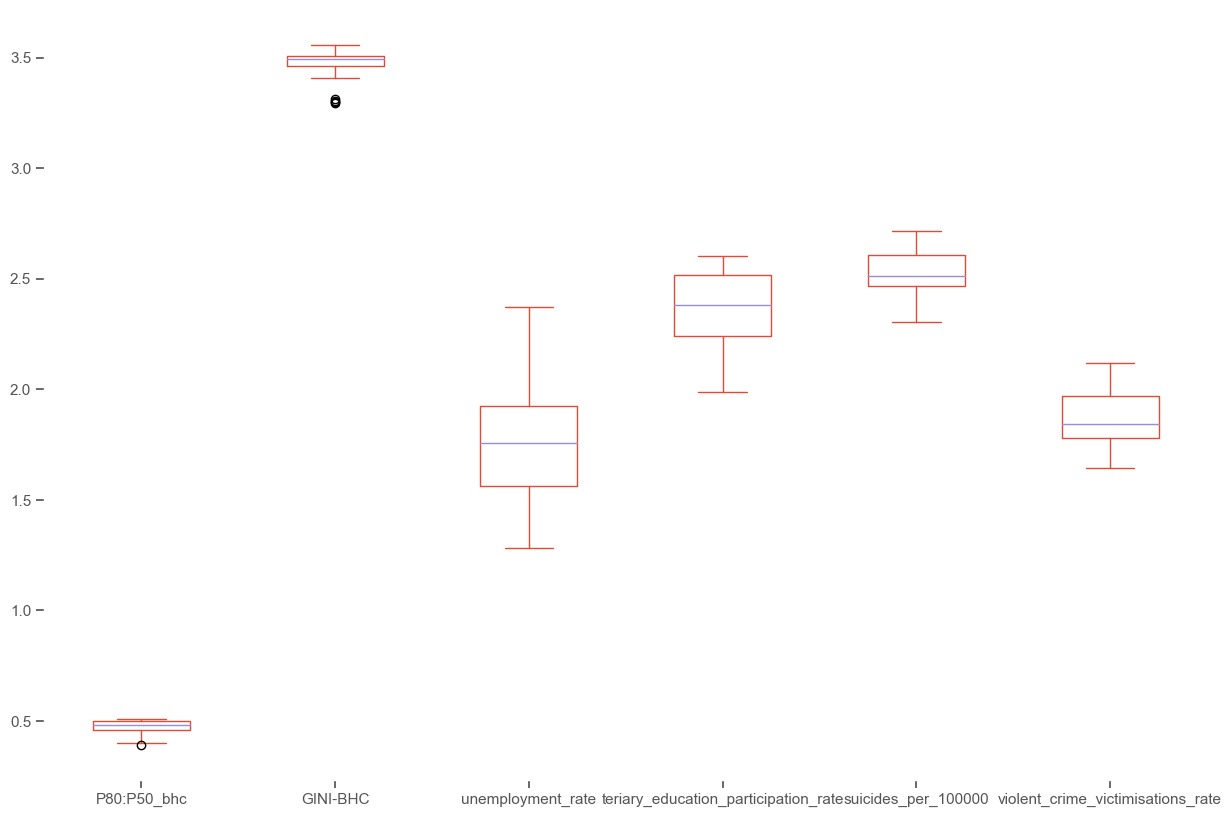

In [62]:
#use box plot to see the data patterns
np.log(ndf.iloc[:,0:6]).plot(kind='box')

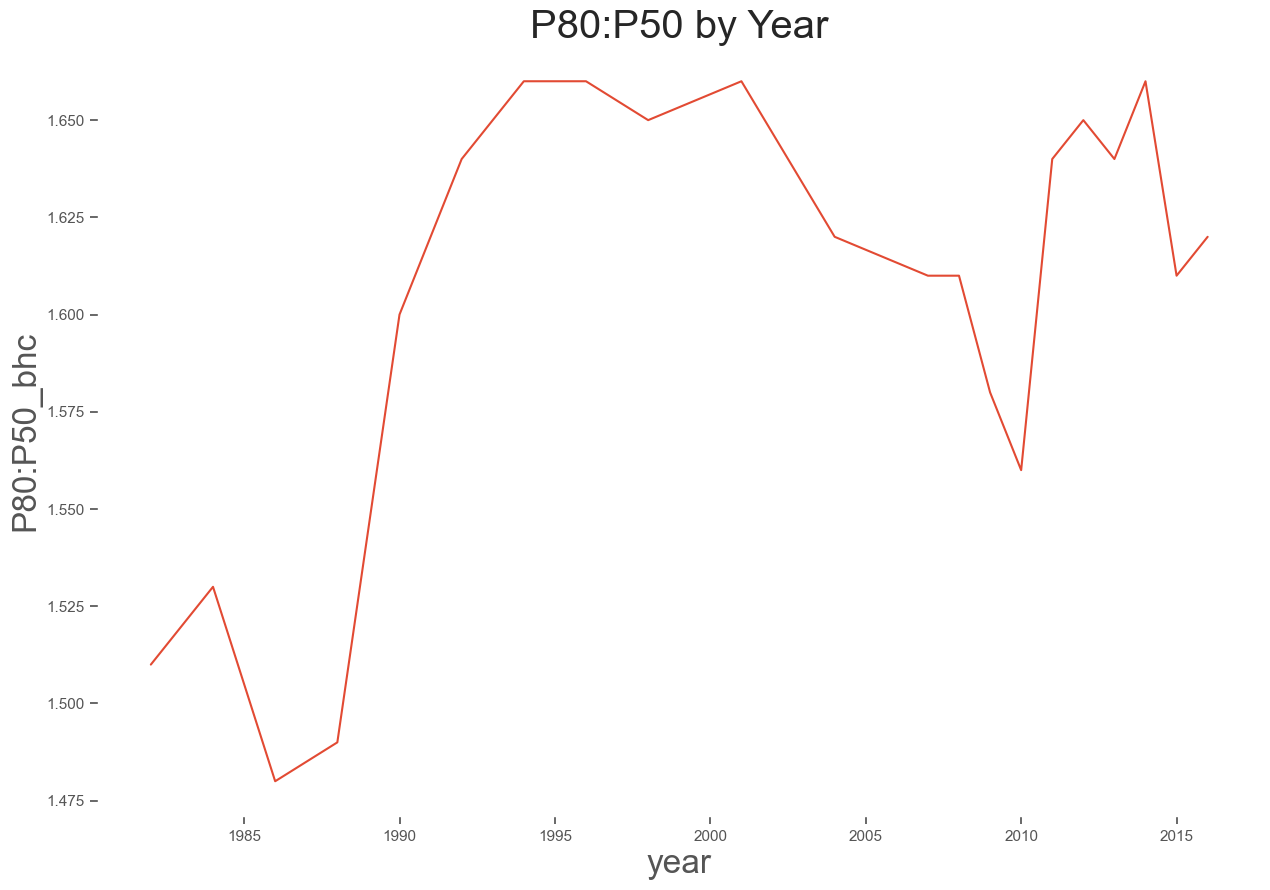

In [69]:
#draw line plot of the related variables
sns.lineplot(x=ndf['year'], y=ndf['P80:P50_bhc'])
plt.title('P80:P50 by Year')
plt.ylabel('P80:P50_bhc')
plt.show()

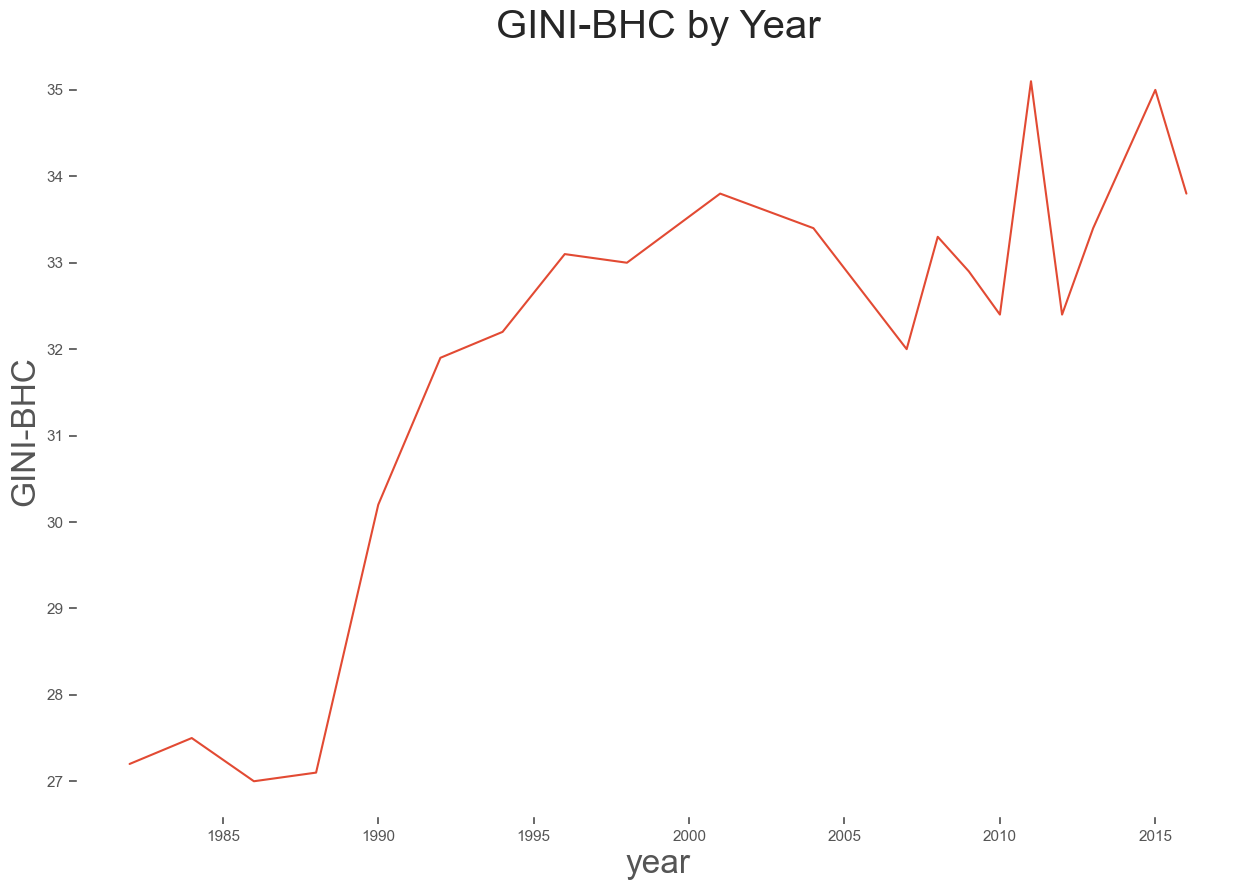

In [67]:
#draw line plot of the related variables
sns.lineplot(x=ndf['year'], y=ndf['GINI-BHC'])
plt.title('GINI-BHC by Year')
plt.ylabel('GINI-BHC')
plt.show()

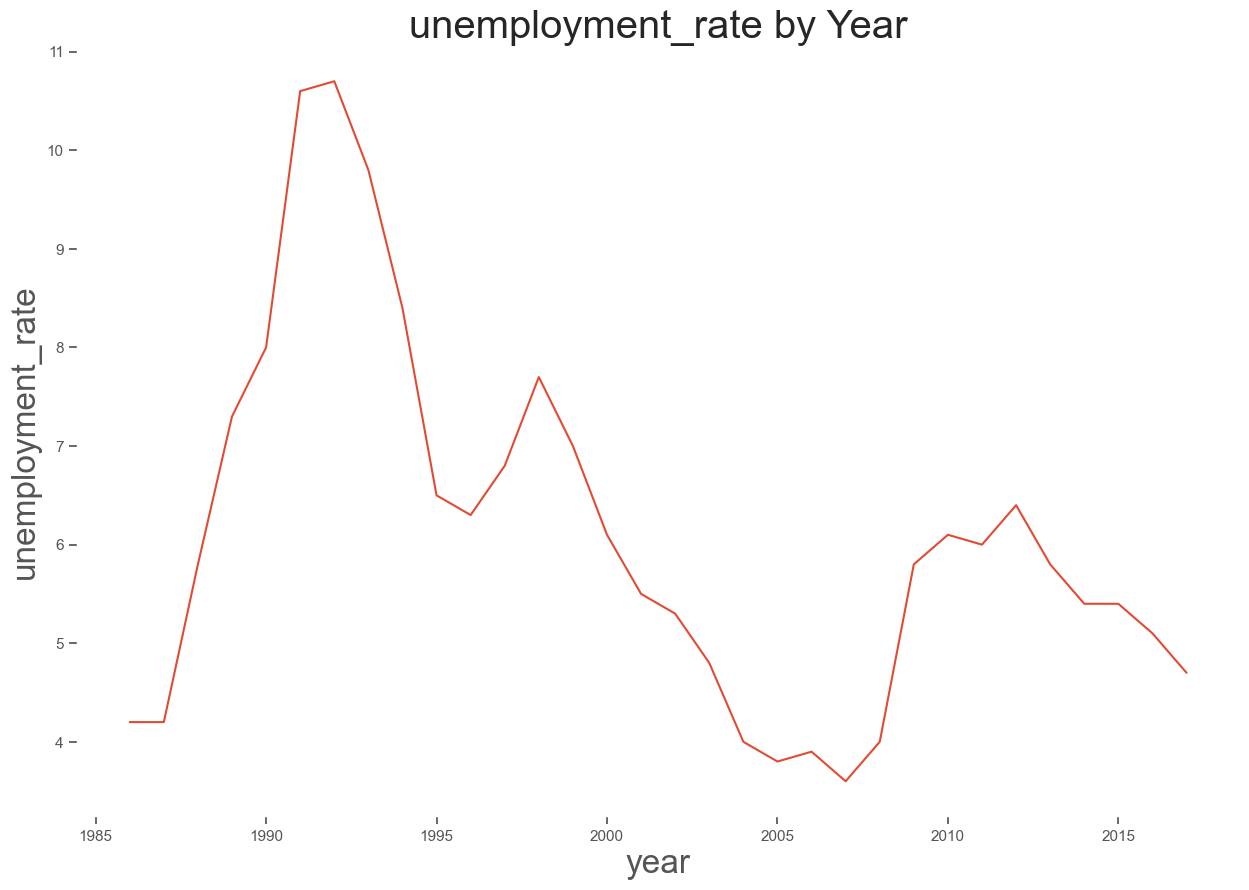

In [68]:
#draw line plot of the related variables
sns.lineplot(x=ndf['year'], y=ndf['unemployment_rate'])
plt.title('unemployment_rate by Year')
plt.ylabel('unemployment_rate')
plt.show()

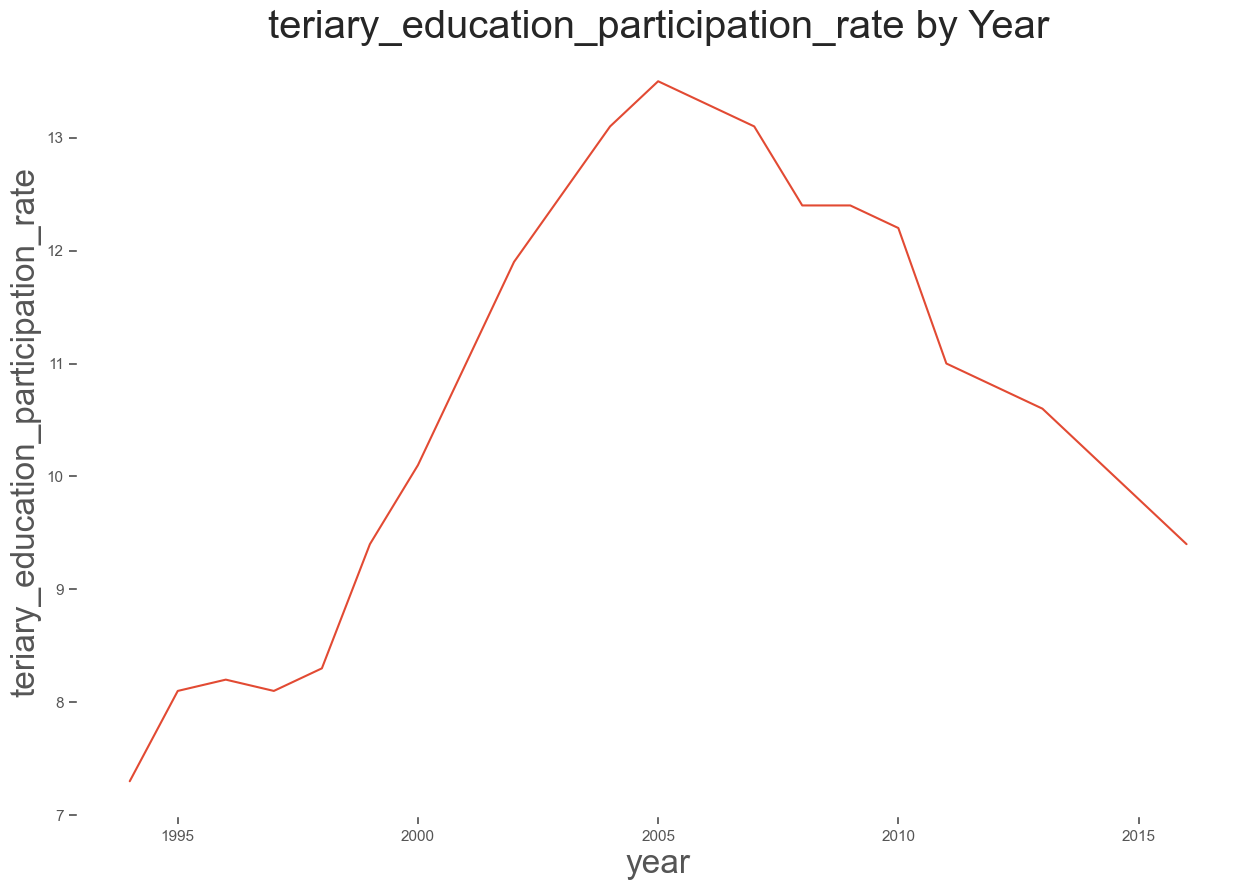

In [70]:
#draw line plot of the related variables
sns.lineplot(x=ndf['year'], y=ndf['teriary_education_participation_rate'])
plt.title('teriary_education_participation_rate by Year')
plt.ylabel('teriary_education_participation_rate')
plt.show()

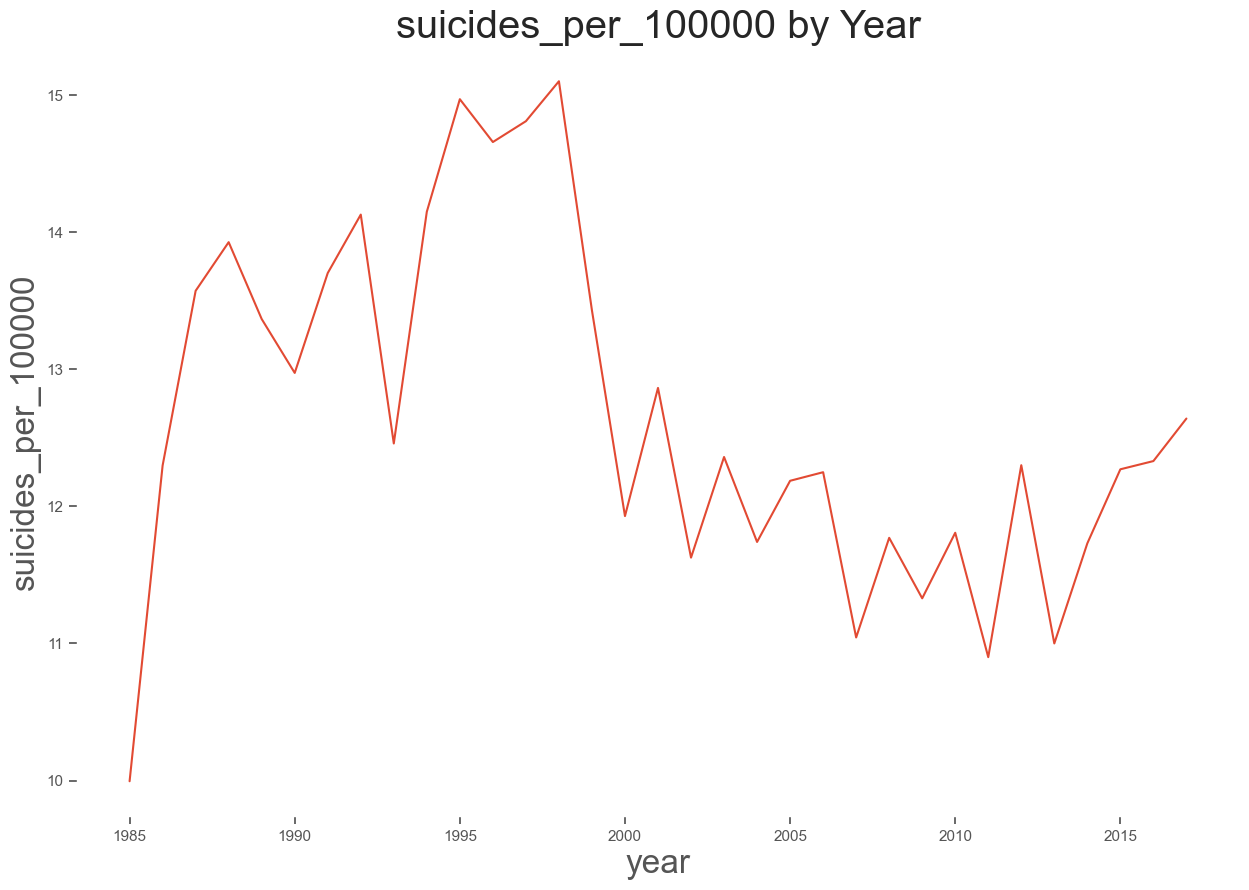

In [71]:
#draw line plot of the related variables
sns.lineplot(x=ndf['year'], y=ndf['suicides_per_100000'])
plt.title('suicides_per_100000 by Year')
plt.ylabel('suicides_per_100000')
plt.show()

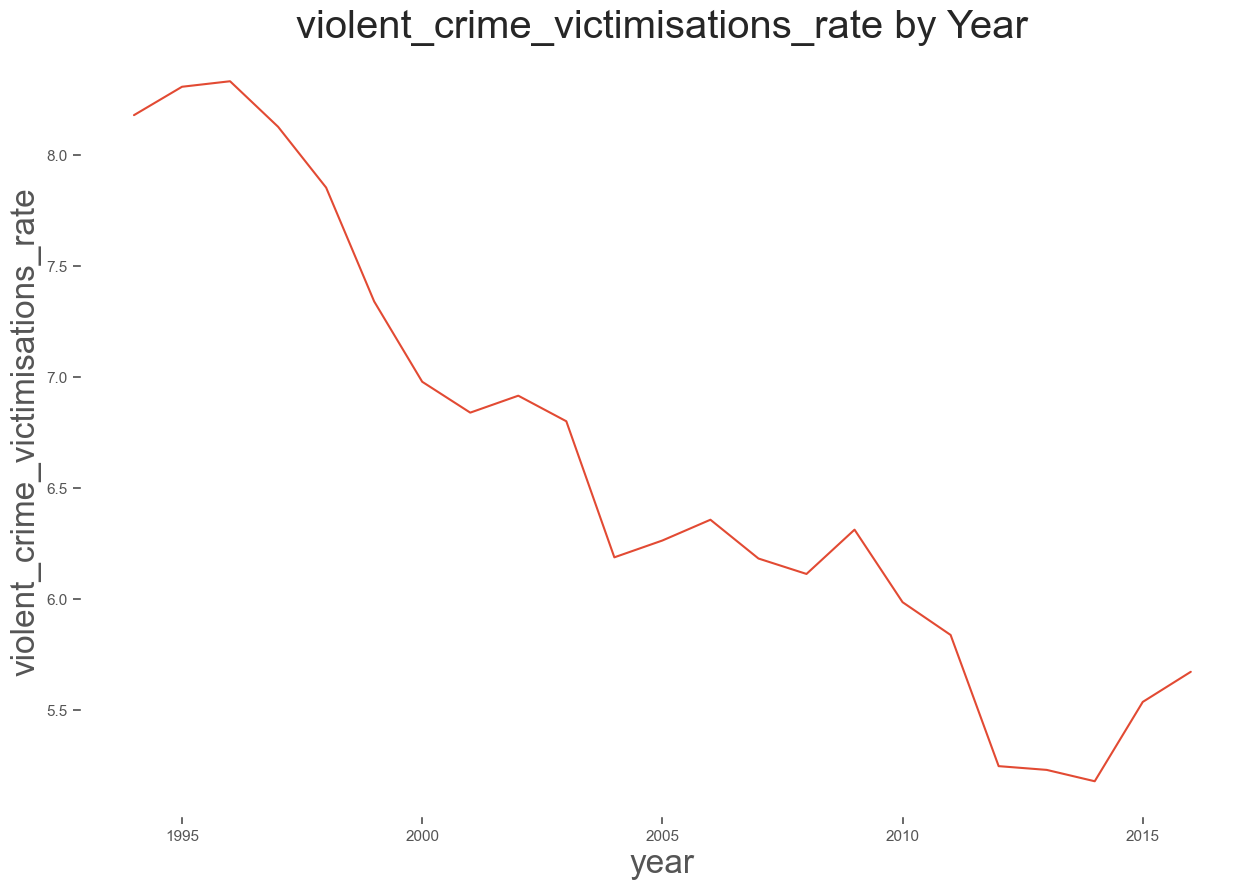

In [72]:
#draw line plot of the related variables
sns.lineplot(x=ndf['year'], y=ndf['violent_crime_victimisations_rate'])
plt.title('violent_crime_victimisations_rate by Year')
plt.ylabel('violent_crime_victimisations_rate')
plt.show()

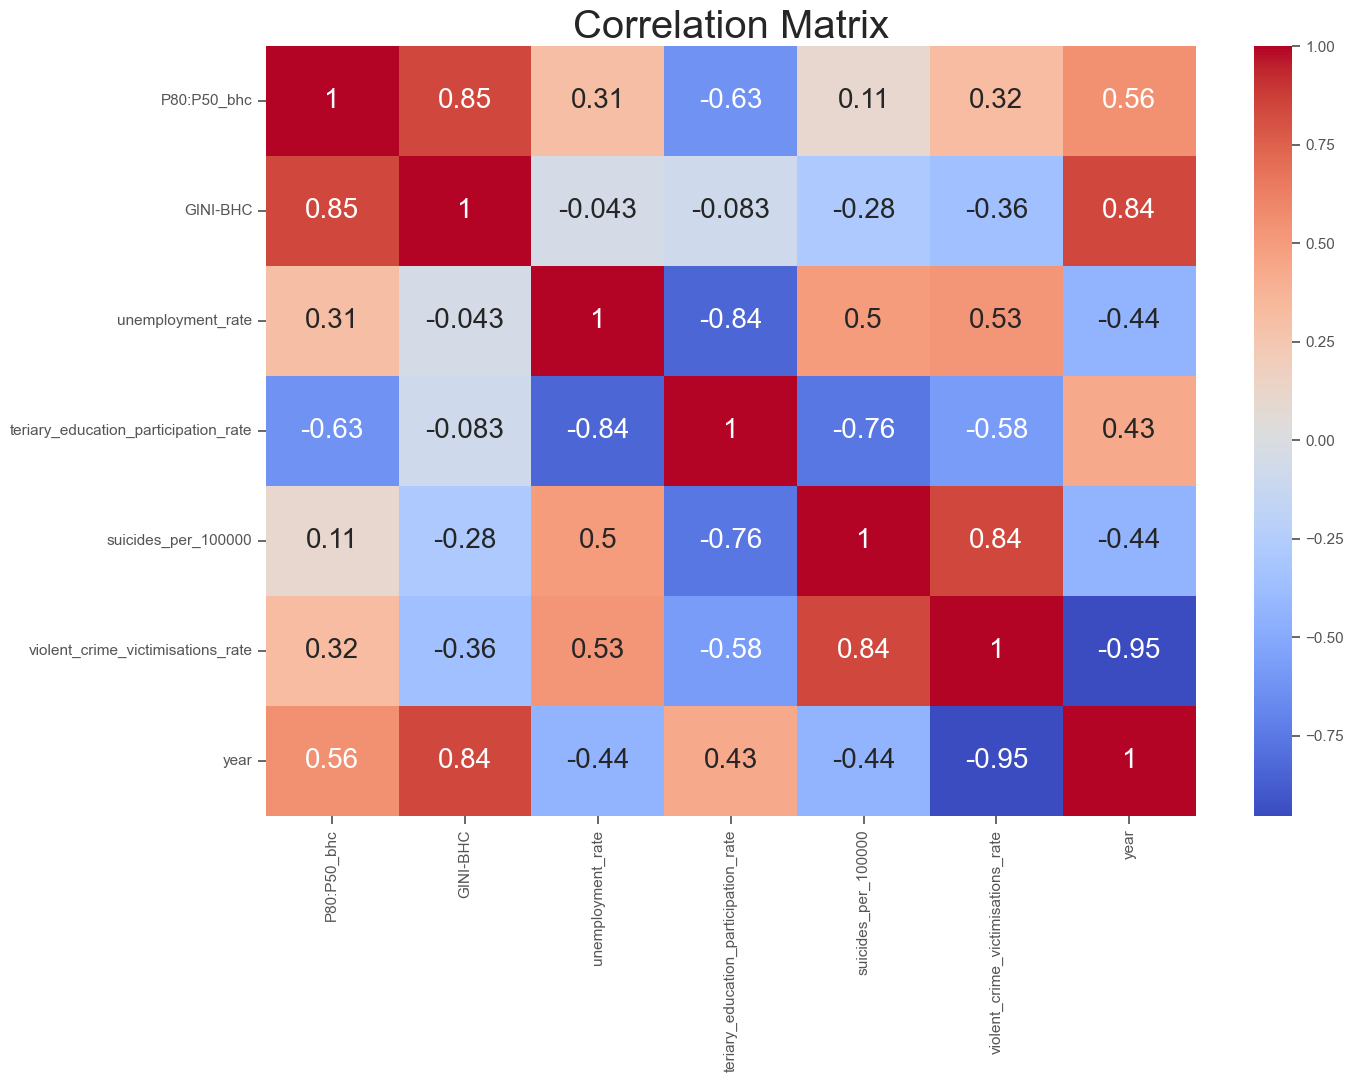

In [75]:
# Correlation analysis
corr_matrix = ndf.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Analysis 

### Research Background

In the past three years, the Covid-19 pandemic has had a significant negative impact on the global economy, resulting in job losses for many people. In New Zealand, this has been accompanied by a spate of disturbing incidents such as youth suicides and indiscriminate intentional assaults. It is possible that there is a correlation between these incidents and the widening wealth gap and unemployment rates in the country. Additionally, with an increasing number of people opting for postgraduate education, there is a need to investigate the relationship between tertiary education rates and unemployment. By examining these factors, we may be able to gain a better understanding of the challenges facing the New Zealand population and identify potential solutions to address them.

### Data Accuracy Description
Prior to analysis, the dataset was carefully cleaned to address issues such as missing values, duplicates, and outliers. To ensure data accuracy, box plots were generated to identify any remaining outliers. After thorough examination, no outliers were detected, indicating that the dataset is suitable for analysis.

### Data Extracted for Analysis
For the analysis, seven variables were selected from the original dataset. These variables include "P80:P20_BHC", "GINI-BHC", "tertiary_education_participation_rate", "suicides_per_100000", and "violent_crime_victimisations_rate". Their descriptions are as follows:

•	"P80:P20_BHC": This variable represents the ratio of income between the 80th and 20th percentile before housing costs. As the income inequality between the top and bottom percentiles increases, the ratio increases as well.

•	"GINI-BHC": This variable is the Gini coefficient multiplied by 100 before housing costs. The coefficient ranges between 0 and 1, where 0 represents perfect equality and 1 represents perfect inequality. It is a commonly used measure for income inequality and provides an overview of the entire income distribution.

•	"tertiary_education_participation_rate": This variable represents the number of enrollments in tertiary education as a percentage of the population aged 15 and over.

•	"suicides_per_100000": This variable represents the number of suicides per 100,000 population.

•	"violent_crime_victimisations_rate": This variable represents the incidence of violent crime as a percentage of the population.
These variables have been selected to explore the research questions related to income inequality, education, and their impact on social issues such as suicide and crime rates.


### Data Analysis
Firstly, the analysis reveals a weak negative correlation between the gap between the rich and the poor and suicide and violent crime rates. The line plot of P80:P20, suicides, and crime rate shows that the P80:P20 ratio averaged around 2.3 in the early 1980s, increasing to around 2.6 by 2010. In contrast, suicides per 100,000 population slightly improved in the 1990s to 15 and remained stable at around 12 until 2015. The crime rate has been trending downward over the years. Consequently, the trend of P80:P20 and suicides/crime rate are opposite. The correlation analysis confirms this finding, with the correlation coefficient between P80:P20 and suicides being -0.33 and the correlation coefficient between P80:P20 and the crime rate being -0.46.

Secondly, the unemployment rate exhibits a moderate positive correlation with suicides and crime rates, with correlation coefficients of 0.5 and 0.53, respectively. This means that as the unemployment rate increases, there is also an increase in the rates of suicides and crimes. While this correlation does not necessarily imply causation, it is an important finding that there may be a link between unemployment and social instability.

Thirdly, the analysis reveals a strong negative correlation between the tertiary education rate and unemployment rates. The higher the tertiary education rate, the lower the unemployment rate. The tertiary education rate by year line plot shows that it was around 8% in the early 1990s, reaching more than 13% in 2006. During the same period, the unemployment rate decreased from 10% to 4%. Moreover, the correlation coefficient between the tertiary education rate and the unemployment rate is -0.84, indicating a strong relationship. 




# Conclusion 

In conclusion, this analysis highlights the correlations between income inequality, unemployment, tertiary education rates, and suicide and crime rates. The findings suggest that income inequality has a weak negative correlation with suicide and violent crime rates, while unemployment has a moderate positive correlation with both suicide and crime rates. On the other hand, the analysis reveals a strong negative correlation between the tertiary education rate and unemployment rates. These results demonstrate the importance of addressing income inequality and providing access to education to promote social stability and reduce rates of suicide and crime. 

However, it is essential to acknowledge the limitations of our analysis, such as the data's quality, completeness, and lack of access to more recent data beyond 2015. Despite these limitations, our findings may provide insight into the possible relationships between these variables and their potential impact on society. Further research and analysis are necessary to confirm these findings and explore more recent data to determine the current trends.

### Key findings:

1. Income inequality has a weak negative correlation with suicide and violent crime rates
2. Unemployment has a moderate positive correlation with both suicide and crime rates.
3. There is a strong negative correlation between the tertiary education rate and unemployment rates

# Bibliography (optional) 